### This is the jupyter notebook for sentiment analysis of the tweets using the Twitter API
### FYP project
### Author: Muhammad Abu Bakar
### Author: Muhammad Faiz Hassan


In [129]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler


In [130]:
# 2. Import keys.py
# use keys here 


auth = tweepy.OAuthHandler( consumer_key , consumer_key_secret )
auth.set_access_token( access_token , access_token_secret )
api = tweepy.API(auth)

print(api)


In [131]:
# 3.To get the tweets in a Proper format, first lets create a Dataframe to store the extracted data.

df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])

# df['date'] = df['date'].apply(lambda a: pd.to_datetime(a).date())
# df['date'] = pd.to_datetime(df['date'])
# df.dtypes
# df['date'] = df['date'].dt.tz_localize(None)
print(df)



Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


## We will use api as api.search inside this tweepy cursor.


In [132]:
# 4.Write a Function to extract tweets:

# We will Use **tweepy.cursor()** because we want to extract a larger number of tweets i.e over 100,500 etc




def get_tweets(Topic,Count):    
    i=0
    
    for tweet in tweepy.Cursor(api.search_tweets, q=Topic,count=500, lang="en",tweet_mode='extended',result_type='recent').items():
        print(i, end='\r')
        date=tweet.created_at
        df.loc[i,"Date"] = date.strftime("%Y-%m-%d")
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.full_text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        
        
        
        df.to_excel('{}.xlsx'.format("TweetDataset"),index=False)   ## Save as Excel
        i=i+1
        if i>Count:
            break
        else:
            pass

# take input from user
Topic = "Pakistan"
# Topic=["Pakistan"]
get_tweets(Topic , Count=500)

In [133]:
# Showing the data the Data
df.head(10)         

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2023-01-13,S A I B E R,False,"RT @Borgeoiusgirl: Balochistan is at war, purs...",0,2,
1,2023-01-13,रंगा - ரங்கா Iyengar,False,"RT @MumbaichaDon: In 2010,Bharat’s Intelligenc...",0,171,Bharat
2,2023-01-13,Ayaz Khan Luni,False,RT @soldierspeaks: In a match versus General S...,0,270,"Balochistan, Pakistan"
3,2023-01-13,Farukh Waqas,False,RT @PTIofficial: “Pakistan needs a democratic ...,0,133,
4,2023-01-13,ADNAN Khan,False,RT @dw_ran: Our nation stands Pak Army. Pakist...,0,1,
5,2023-01-13,𝖆𝖑𝖎 𝖕𝖆𝖙𝖍𝖔𝖑𝖔𝖌𝖎𝖘𝖙🔬,False,RT @PTIofficial: “Pakistan needs a democratic ...,0,133,دار فانی
6,2023-01-13,पर्व चौहान,False,In Pakistan Military appoints Govt not another...,0,0,Gps fail.
7,2023-01-13,Ayesha Mehr,False,RT @soldierspeaks: In a match versus General S...,0,270,"England, United Kingdom"
8,2023-01-13,Rakshith Raksh,False,RT @ESPNcricinfo: Salman Agha is OUT\n\nNot be...,0,6,
9,2023-01-13,Mehmood Awan,False,@OmarAyubKhan Concentrate on performance and d...,0,0,"Winnipeg, Manitoba"


In [134]:
import nltk
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()



def clean_tweet(tweet):
    # tokenization
    tweet = word_tokenize(tweet)
    # lower case
    tweet = [word.lower() for word in tweet]
    tweet = [lemmatizer.lemmatize(word) for word in tweet]
    tweet = [word for word in tweet if word.isalpha()]
    tweet = " ".join(tweet)
    tweet = tweet.strip()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # remove http links
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"@\S+", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"\d+", "", tweet)
    # remove https and username and special characters
    tweet = ' '.join(re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = tweet.split()
    tweet = [word for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    tweet = PorterStemmer().stem(tweet)
    tweet = tweet.strip('https')
    tweet =tweet.split()
    tweet = [t for t in tweet if len(t) > 2]
    tweet = " ".join(tweet)
    
    
    return tweet



[nltk_data] Downloading package omw-1.4 to /home/bakar/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [135]:


from textblob import TextBlob
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'



In [136]:

from wordcloud import WordCloud, STOPWORDS


def prepCloud(Topic_text,Topic):
    Topic = str(Topic).lower()
    Topic=' '.join(re.sub('([^0-9A-Za-z \t])', ' ', Topic).split())
    Topic = re.split("\s+",str(Topic))
    stopwords = set(STOPWORDS)
    stopwords.update(Topic) ### Add our topic in Stopwords, so it doesnt appear in wordClous
    ###
    text_new = " ".join([txt for txt in Topic_text.split() if txt not in stopwords])
    # don't want to prnt these words in WordCloud
    return text_new


prepCloud("Pakistan",Topic)



'Pakistan'

In [137]:
df['clean_tweet'] = df['Tweet'].apply(lambda x : clean_tweet(x))


df.head(5)


,Date,User,IsVerified,Tweet,Likes,RT,User_location,clean_tweet
0,2023-01-13,S A I B E R,False,"RT @Borgeoiusgirl: Balochistan is at war, purs...",0,2,,borgeoiusgirl balochistan war pursued unfamili...
1,2023-01-13,रंगा - ரங்கா Iyengar,False,"RT @MumbaichaDon: In 2010,Bharat’s Intelligenc...",0,171,Bharat,mumbaichadon bharat intelligence agency found ...
2,2023-01-13,Ayaz Khan Luni,False,RT @soldierspeaks: In a match versus General S...,0,270,"Balochistan, Pakistan",soldierspeaks match versus general staff branc...
3,2023-01-13,Farukh Waqas,False,RT @PTIofficial: “Pakistan needs a democratic ...,0,133,,ptiofficial pakistan need democratic transitio...
4,2023-01-13,ADNAN Khan,False,RT @dw_ran: Our nation stands Pak Army. Pakist...,0,1,,nation stand pak army pakistan zindabad


In [138]:


df["Sentiment"] = df["Tweet"].apply(lambda x : analyze_sentiment(x))
df.head(10)
# save df['sentiment'] to csv
df.to_excel('{}.xlsx'.format("Sentiment"),index=False)   ## Save as Excel



In [139]:
# use naive bayes classifier for sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


# 1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy

# 
# Split into training and testing data
# load data from sentiment.xlsx
x = df['clean_tweet']
y = df['Sentiment']
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [140]:
# Vectorize text reviews to numbers
vec = CountVectorizer()
x = vec.fit_transform(x)
x_test = vec.transform(x_test)


In [141]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [142]:
model.score(x_test, y_test)
print("Accuracy of Naive Bayes Classifier is : ",model.score(x_test, y_test)*100,"%")


Accuracy of Naive Bayes Classifier is :  73.26732673267327 %


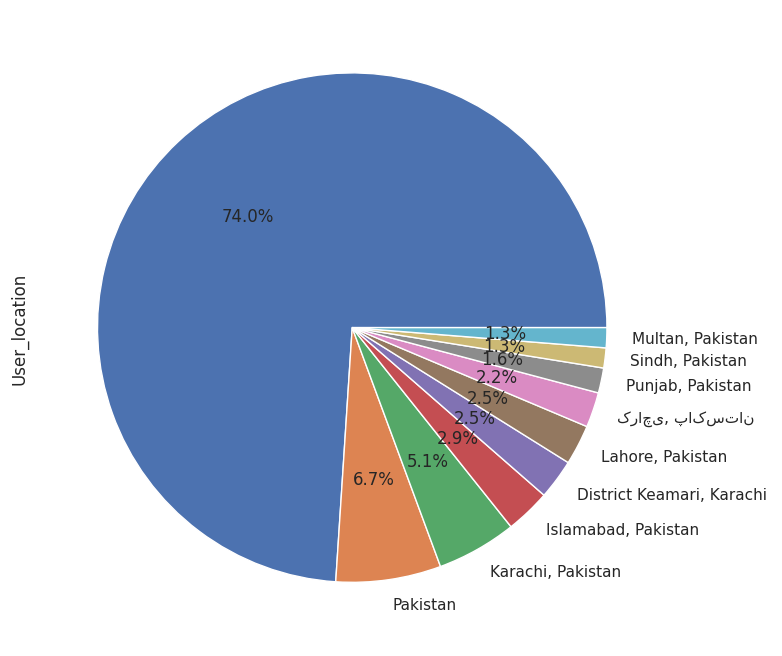

In [143]:
# create pie chart on basis of user location if user location > 1%
sns.set_style('darkgrid')
# if location is null then replace it with 'Unknown'
df['User_location'].fillna('Unknown', inplace=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plot pie chart
df['User_location'].value_counts()[:10].plot(kind='pie', autopct='%1.1f%%')
plt.show()



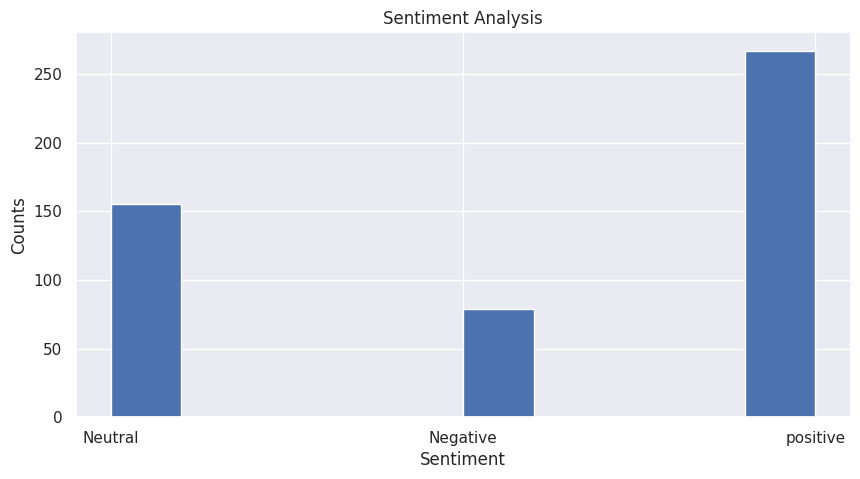

([<matplotlib.patches.Wedge at 0x7f43a148c6a0>,
 [Text(-0.11360922653234136, 1.0941174268088063, 'positive'),
  Text(-0.42015505199617226, -1.016597133717233, 'Neutral'),
  Text(0.9677664996026963, -0.5229034349158023, 'Negative')],
 [Text(-0.06196866901764073, 0.5967913237138942, '53.3%'),
  Text(-0.22917548290700301, -0.5545075274821271, '30.9%'),
  Text(0.5278726361469253, -0.2852200554086194, '15.8%')])

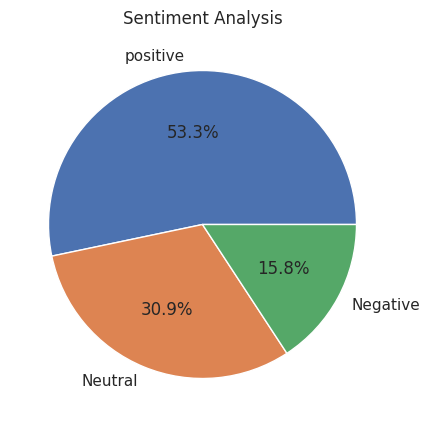

In [144]:
# print report of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
plt.hist(df['Sentiment'])
plt.show()
# print pie chart of sentiment analysis
plt.figure(figsize=(10, 5))
plt.title('Sentiment Analysis')
plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].value_counts().index, autopct='%1.1f%%')

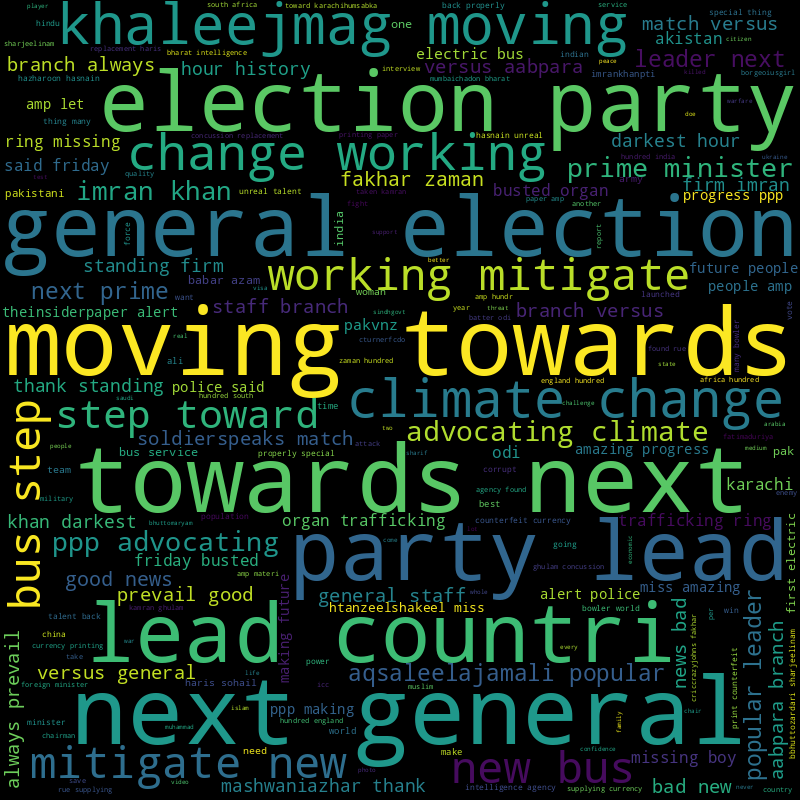

In [145]:
# plot word cloud for maximum occuring words
wordcloud = WordCloud(width = 800, height = 800)
wordcloud.generate(prepCloud(df['clean_tweet'].str.cat(sep=' '),Topic))
wordcloud.to_image()